In [252]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb
import json
from bs4 import BeautifulSoup
from urllib.parse import unquote, quote
from datetime import datetime
%matplotlib inline

Part 1: Getting COVID data
For this section we will be using the COVID tracking API (https://covid19api.com/Links to an external site.) to find 
information about the US and US states. First, look at the documentationLinks to an external site. about this API. 
Make sure you select Python as your language up in the top menu. This will provide you with some sample queries.
Then, using requests, use the COVID API to answer the following questions:
Task 1: Find the total number of confirmed cases in the USA
Task 2: Find the country that has the most number of COVID deaths

In [253]:
#Task 1: I will request data on Covid cases in the USA and find the most number of confirmed Covid cases.
Link1 = "https://api.covid19api.com/total/country/united-states"

In [254]:
r1=requests.get(Link1)
json_data1=r1.json()
json_data1

[{'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-22T00:00:00Z',
  'Comment': 'no reliable source to provide recovered data'},
 {'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 1,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 1,
  'Date': '2020-01-23T00:00:00Z',
  'Comment': 'no reliable source to provide recovered data'},
 {'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '0',
  'Lon': '0',
  'Confirmed': 2,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 2,
  'Date': '2020-01-24T00:00:00Z',
  'Comment': 'no reliable source to provide recovered data'},
 {'Country': 'United States of America',
  'CountryCode': '',
  'Province': '',
  'City': '',


In [255]:
json_data1[-1]["Confirmed"]

103802702

The total number of confirmed cases in the USA is 103802702.

In [256]:
#b) Find the country that has the most number of COVID deaths. 
Link2= "https://api.covid19api.com/summary"

In [257]:
r2=requests.get(Link2)
json_data2=r2.json()
json_data2

{'ID': 'eecdcbc3-1137-42d5-bf78-2627c84a1a1c',
 'Message': '',
 'Global': {'NewConfirmed': 177325,
  'TotalConfirmed': 674300771,
  'NewDeaths': 1319,
  'TotalDeaths': 6793224,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2023-04-06T05:26:12.346Z'},
 'Countries': [{'ID': 'e0afc051-4a2a-4b27-8d40-00b7910b2e8c',
   'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 0,
   'TotalConfirmed': 209451,
   'NewDeaths': 0,
   'TotalDeaths': 7896,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2023-04-06T05:26:12.346Z',
   'Premium': {}},
  {'ID': 'd224d722-8f5f-4922-9f49-9a24f946f0a4',
   'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 14,
   'TotalConfirmed': 334457,
   'NewDeaths': 0,
   'TotalDeaths': 3598,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2023-04-06T05:26:12.346Z',
   'Premium': {}},
  {'ID': 'd06095fd-acb4-4c2e-bdb1-a109a165652a',
   'Country': 'Algeria',
   'Coun

In [258]:
countries = json_data2['Countries']
df2 = pd.json_normalize(countries) #convert the json data in csv format
df2

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,e0afc051-4a2a-4b27-8d40-00b7910b2e8c,Afghanistan,AF,afghanistan,0,209451,0,7896,0,0,2023-04-06T05:26:12.346Z
1,d224d722-8f5f-4922-9f49-9a24f946f0a4,Albania,AL,albania,14,334457,0,3598,0,0,2023-04-06T05:26:12.346Z
2,d06095fd-acb4-4c2e-bdb1-a109a165652a,Algeria,DZ,algeria,2,271496,0,6881,0,0,2023-04-06T05:26:12.346Z
3,90f82175-3518-4d1c-8e2b-fa2e4a9c38c6,Andorra,AD,andorra,0,47890,0,165,0,0,2023-04-06T05:26:12.346Z
4,1d3b26cb-1b5a-4ecd-8bb7-2e2d63c63cc8,Angola,AO,angola,0,105288,0,1933,0,0,2023-04-06T05:26:12.346Z
...,...,...,...,...,...,...,...,...,...,...,...
192,093fa3b4-4b3a-4037-a809-ca9528e43b4e,Venezuela (Bolivarian Republic),VE,venezuela,5,552162,0,5854,0,0,2023-04-06T05:26:12.346Z
193,d5d046c2-0515-4af4-884c-1586d5cf19ba,Viet Nam,VN,vietnam,0,11526994,0,43186,0,0,2023-04-06T05:26:12.346Z
194,03365fd8-3090-4f37-9202-34a8ae289cd3,Yemen,YE,yemen,0,11945,0,2159,0,0,2023-04-06T05:26:12.346Z
195,98134624-cfcc-4067-b333-009a77176b6e,Zambia,ZM,zambia,0,343135,0,4057,0,0,2023-04-06T05:26:12.346Z


In [259]:
highest_death_rate_country = df2.sort_values(by='TotalDeaths', ascending=False).iloc[[0]]
print(highest_death_rate_country)

                                       ID                   Country  \
188  400a8d4e-e28d-4a00-a1eb-2069b8c3dcd6  United States of America   

    CountryCode           Slug  NewConfirmed  TotalConfirmed  NewDeaths  \
188          US  united-states         46931       103802702        590   

     TotalDeaths  NewRecovered  TotalRecovered                      Date  
188      1123836             0               0  2023-04-06T05:26:12.346Z  


The country that has the most number of COVID deaths is the United States of America.  

In [260]:
#Part 2: In this next portion, you'll get some experience poking around an unfamiliar data source.  Find a new API 
#(one we haven’t used in class) and dig into it.  Pull some data from it like we’ve been doing in our examples in class 
#and present that data. The scope of this mini-project is up to you, but at a minimum you should:Make at least three 
#API requests total.
#Make a request to an API and then use data from that first request to make additional requests. (This is similar to 
#how, in our in-class example, we had to look up show IDs with TV Maze and then request data about a show using a show 
#ID.)
#You should provide some explanation with what you’ve done and what the output means.  (Nothing too fancy or formal, 
#just some explanation as comments or markup in your Jupyter notebook.)  If you do some data exploration and calculate 
#anything, you can provide some hypotheses and commentary on whether or not your results line up with your expectations.
#Have fun!
#Note: The problem says *minimum*.  That means that the more you do on this one the better your grade.  If you do the 
#minimum (executed perfectly), expect an 80% on this problem. To get above an 80%, you'll need to do an "above and 
#beyond" component.

In [261]:
#I requested data about the states in the USA. 
Link3= "https://aqs.epa.gov/data/api/list/states?email=test@aqs.api&key=test"

In [262]:
r3=requests.get(Link3)
json_data3=r3.json()
json_data3

{'Header': [{'status': 'Success',
   'request_time': '2023-04-06T02:42:57-04:00',
   'url': 'https://aqs.epa.gov/data/api/list/states?email=test@aqs.api&key=test',
   'rows': 56}],
 'Data': [{'code': '01', 'value_represented': 'Alabama'},
  {'code': '02', 'value_represented': 'Alaska'},
  {'code': '04', 'value_represented': 'Arizona'},
  {'code': '05', 'value_represented': 'Arkansas'},
  {'code': '06', 'value_represented': 'California'},
  {'code': '08', 'value_represented': 'Colorado'},
  {'code': '09', 'value_represented': 'Connecticut'},
  {'code': '10', 'value_represented': 'Delaware'},
  {'code': '11', 'value_represented': 'District Of Columbia'},
  {'code': '12', 'value_represented': 'Florida'},
  {'code': '13', 'value_represented': 'Georgia'},
  {'code': '15', 'value_represented': 'Hawaii'},
  {'code': '16', 'value_represented': 'Idaho'},
  {'code': '17', 'value_represented': 'Illinois'},
  {'code': '18', 'value_represented': 'Indiana'},
  {'code': '19', 'value_represented': 'Io

In [263]:
#I requested data about the 21st state in the dictionary.
json_data3["Data"][21]["code"]

'25'

In [264]:
Link4 = "https://aqs.epa.gov/data/api/list/countiesByState?email=test@aqs.api&key=test&state=25"

In [265]:
r4=requests.get(url=Link4)
json_data4=r4.json()
json_data4

{'Header': [{'status': 'Success',
   'request_time': '2023-04-06T02:42:58-04:00',
   'url': 'https://aqs.epa.gov/data/api/list/countiesByState?email=test@aqs.api&key=test&state=25',
   'rows': 14}],
 'Data': [{'code': '001', 'value_represented': 'Barnstable'},
  {'code': '003', 'value_represented': 'Berkshire'},
  {'code': '005', 'value_represented': 'Bristol'},
  {'code': '007', 'value_represented': 'Dukes'},
  {'code': '009', 'value_represented': 'Essex'},
  {'code': '011', 'value_represented': 'Franklin'},
  {'code': '013', 'value_represented': 'Hampden'},
  {'code': '015', 'value_represented': 'Hampshire'},
  {'code': '017', 'value_represented': 'Middlesex'},
  {'code': '019', 'value_represented': 'Nantucket'},
  {'code': '021', 'value_represented': 'Norfolk'},
  {'code': '023', 'value_represented': 'Plymouth'},
  {'code': '025', 'value_represented': 'Suffolk'},
  {'code': '027', 'value_represented': 'Worcester'}]}

In [266]:
#I requested data about the 5th county of Massachusets.
json_data4["Data"][5]["code"]

'011'

In [267]:
Link5 = "https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=011"

In [268]:
r5=requests.get(url=Link5)
json_data5=r5.json()
json_data5

{'Header': [{'status': 'Success',
   'request_time': '2023-04-06T02:42:59-04:00',
   'url': 'https://aqs.epa.gov/data/api/dailyData/byCounty?email=canoi@whitman.edu&key=goldmallard38&param=44201&bdate=20160101&edate=20161231&state=25&county=011',
   'rows': 1456}],
 'Data': [{'state_code': '25',
   'county_code': '011',
   'site_number': '2005',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 42.605816,
   'longitude': -72.596689,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'sample_duration_code': '1',
   'sample_duration': '1 HOUR',
   'pollutant_standard': 'Ozone 1-hour 1979',
   'date_local': '2016-01-01',
   'units_of_measure': 'Parts per million',
   'event_type': 'No Events',
   'observation_count': 24,
   'observation_percent': 100.0,
   'validity_indicator': 'Y',
   'arithmetic_mean': 0.031,
   'first_max_value': 0.036,
   'first_max_hour': 20,
   'aqi': None,
   'method_code': '087',
   'method': 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION',
   'local_site_name': 'G

Above and Beyond 

I will plot a graph of ozone concentration for the county Franklin in Massachusetts in the year of 2016. 

In [269]:
df5 = pd.json_normalize(json_data5["Data"])
df5.to_csv("output.csv", index=False) #convert to csv format
df5

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,25,011,2005,44201,1,42.605816,-72.596689,WGS84,Ozone,1,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Greenfield 16 Barr Ave,VETERANS FIELD,Massachusetts,Franklin,Greenfield,24640,"Greenfield Town, MA",2021-11-10
1,25,011,2005,44201,1,42.605816,-72.596689,WGS84,Ozone,W,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Greenfield 16 Barr Ave,VETERANS FIELD,Massachusetts,Franklin,Greenfield,24640,"Greenfield Town, MA",2023-02-05
2,25,011,2005,44201,1,42.605816,-72.596689,WGS84,Ozone,W,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Greenfield 16 Barr Ave,VETERANS FIELD,Massachusetts,Franklin,Greenfield,24640,"Greenfield Town, MA",2023-02-05
3,25,011,2005,44201,1,42.605816,-72.596689,WGS84,Ozone,1,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Greenfield 16 Barr Ave,VETERANS FIELD,Massachusetts,Franklin,Greenfield,24640,"Greenfield Town, MA",2021-11-10
4,25,011,2005,44201,1,42.605816,-72.596689,WGS84,Ozone,W,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Greenfield 16 Barr Ave,VETERANS FIELD,Massachusetts,Franklin,Greenfield,24640,"Greenfield Town, MA",2023-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,25,011,2005,44201,1,42.605816,-72.596689,WGS84,Ozone,W,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Greenfield 16 Barr Ave,VETERANS FIELD,Massachusetts,Franklin,Greenfield,24640,"Greenfield Town, MA",2023-02-05
1452,25,011,2005,44201,1,42.605816,-72.596689,WGS84,Ozone,1,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Greenfield 16 Barr Ave,VETERANS FIELD,Massachusetts,Franklin,Greenfield,24640,"Greenfield Town, MA",2021-11-10
1453,25,011,2005,44201,1,42.605816,-72.596689,WGS84,Ozone,W,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Greenfield 16 Barr Ave,VETERANS FIELD,Massachusetts,Franklin,Greenfield,24640,"Greenfield Town, MA",2023-02-05
1454,25,011,2005,44201,1,42.605816,-72.596689,WGS84,Ozone,W,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,Greenfield 16 Barr Ave,VETERANS FIELD,Massachusetts,Franklin,Greenfield,24640,"Greenfield Town, MA",2023-02-05


In [270]:
new_df5=df5.loc[:,["date_local", "arithmetic_mean"]] #place two rows in the table
new_df5 

,date_local,arithmetic_mean
0,2016-01-01,0.031000
1,2016-01-01,0.030625
2,2016-01-01,0.030625
3,2016-01-02,0.031870
4,2016-01-02,0.030500
...,...,...
1451,2016-12-30,0.033235
1452,2016-12-31,0.028182
1453,2016-12-31,0.027000
1454,2016-12-31,0.027000


In [271]:
x = new_df5['date_local']
y = new_df5['arithmetic_mean']

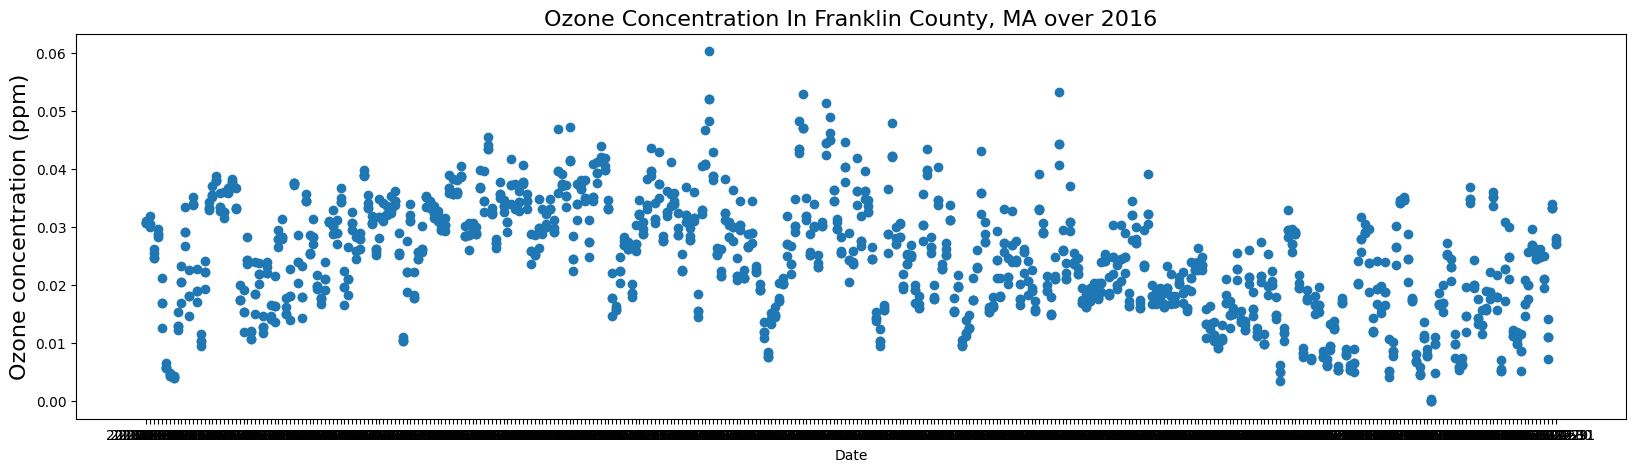

In [272]:
fig=plt.figure()  #use mathplotlib to plot a graph with x as the time variable and y as the daily ozone concentration
plt.close(fig)
plt.figure(figsize = (20,5)) 
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)', fontsize=16)
plt.title('Ozone Concentration In Franklin County, MA over 2016', fontsize=16)
plt.scatter(x, y)

Part 3:Web Scraping information about guitar pedals
In this portion, you'll be using requests and BeautifulSoup to scrape information from a website that is reviewing 
fuzz pedals for guitars: http://www.guitarsite.com/fuzz-pedals/Links to an external site..
Task 1: Use requests to get the HTML from this page and BeautifulSoup to turn it into soup.
Task 2: Using the parsed BeautifulSoup, answer the following questions:
How many "table" tags are there on this page?
The "good stuff" is in the table with the id "amptb" -- what one line of code will get you just that table and print 
out its contents?
Print out the name of each pedal, followed by its description on a separate line.

Task 1: Use requests to get the HTML from this page and BeautifulSoup to turn it into soup.

In [273]:
link_guitar= 'http://www.guitarsite.com/fuzz-pedals/'

In [274]:
ans_guitar=requests.get(link_guitar)
soup1=BeautifulSoup(ans_guitar.content, 'html.parser')
soup1

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><script data-cfasync="false" data-ezscrex="false" data-pagespeed-no-defer="">var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,o=[],s=[],r=!0,a=function(e,i,n,o,s,r,a){var l=arguments.length>7&&void 0!==arguments[7]?arguments[7]:window,c=this;this.name=e,this.funcName=i,this.parameters=null===n?null:p(n)?n:[n],this.isBlock=o,this.blockedBy=s,this.deleteWhenComplete=r,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.fWindow=l,this.isTimeDelay=!1,this.process=function(){f("... func = "+e),c.isInitialized=!0,c.isComplete=!0,f("... func.apply: "+e);var i=c.funcName.split("."),n=null,o=this.fWindow||window;i.length>3||(n=3===i.length?o[i[0]][i[1]][i[2]]:2=

Task 2: Using the parsed BeautifulSoup, answer the following questions:
How many "table" tags are there on this page?

In [275]:
table_tags=soup1.find_all('table')
len(table_tags)

7

There are 7 table tags. 

The "good stuff" is in the table with the id "amptb" -- what one line of code will get you just that table and print out its contents?

In [276]:
amptb=soup1.find('table', {'id':'amptb'})
amptb

<table border="0" cellpadding="2" cellspacing="4" id="amptb">
<tbody><tr>
<th>Image</th>
<th>Link to Amazon</th>
<th>Overview</th>
<th>Detailed Description</th>
</tr>
<tr>
<td>
<img alt="Dunlop JD-F2 Dallas-Arbiter Fuzz Face" src="/files/dunlop-jd-f1-dallas-arbiter-fuzz-face.jpg" width="100"/>
</td>
<td align="center">
<h3><a href="https://www.amazon.com/gp/product/B0017KN4BY/?tag=guitarsite0d-20" rel="nofollow" target="_blank">Dunlop JD-F2 Dallas-Arbiter Fuzz Face</a></h3>
</td>
<td>
    There wouldn't be a Fuzz pedal market today if not for the popularity of the Fuzz Face. Used by big name artists like Jimi Hendrix, Eric Johnson, Duane Allman, David Gilmore, George Harrison and more, the Dallas-Arbiter Fuzz Face has set the standard high right at the beginning.  
  </td>
<td>
<a href="#1">See our detailed review below</a>
</td>
</tr>
<tr>
<td>
<img alt="EHX Octavix" src="/files/ehx-octavix-fuzz.jpg" width="100"/>
</td>
<td align="center">
<h3><a href="https://www.amazon.com/gp/produc

Print out the name of each pedal, followed by its description on a separate line.

In [277]:
pedal_names= amptb.find_all('tr')[1:] 
for item in pedal_names: 
    md= item.find_all('td')  #extract the table 
    pedals=md[1].text.strip() #extract information for the pedal 
    titles= md[0].text.strip() #extracting the first column from the table
    print(titles)
    print(pedals)


Dunlop JD-F2 Dallas-Arbiter Fuzz Face

EHX Octavix

Vox Trike Fuzz

Rotosound 1960s Fuzz Reissue

Dunlop Jimi Hendrix Fuzz Face Mini

Voodoo Lab Superfuzz

Wampler Velvet Fuzz

Boss FZ-5 Fuzz Pedal

Way Huge Swollen Pickle MkII Fuzz Pedal

Suhr Rufus Reloaded Fuzz Pedal


Part 4: Scrape a web page of your choosing
Using requests and BeauitfulSoup, get the information from a web page of your choice and do something interesting with 
it. As with Part 2, the scope of this mini-project is up to you. But at a minimum you should:
Pick one interesting element (i.e. tag) of the webpage and get all instances of that element. Store that information 
in a structured way (a list, a dataframe, a dictionary, etc.)
Note: The problem says *minimum*.  That means that the more you do on this one the better your grade.  If you do the 
minimum (executed perfectly), expect an 80% on this problem. To get above an 80%, you'll need to do an "above and 
beyond" component.

In [278]:
# I will analyse the ESPN website and request info on the NFL schedule. 
espn_url = "https://www.espn.com/nfl/schedule"
espn_res = requests.get(espn_url)
# Create a BeautifulSoup object to parse the HTML content
espn_soup = BeautifulSoup(espn_res.content, 'html.parser')
espn_soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<!-- ESPNFITT | 3d570530981f | 7048 | 48ade8d123f76e1229a73b7487e755f9bc2cb54a | Thu, 06 Apr 2023 06:43:10 GMT -->
<script async="" src="https://dcf.espn.com/TWDC-DTCI/prod/Bootstrap.js" type="text/javascript"></script>
<script type="text/javascript">
        ;(function(){
            function gc(n){n=document.cookie.match("(^|;) ?"+n+"=([^;]*)(;|$)");return n?n[2]:null}function sc(n){document.cookie=n}function smpl(n){n/=100;return!!n&&Math.random()<=n}var _nr=!1,_nrCookie=gc("_nr");null!==_nrCookie?"1"===_nrCookie&&(_nr=!0):smpl(1)?(_nr=!0,sc("_nr=1; path=/")):(_nr=!1,sc("_nr=0; path=/"));;
            _nr && (function(){ window.NREUM||(NREUM={});NREUM.init={distributed_tracing:{enabled:true},privacy:{cookies_enabled:true},ajax:{deny_list:["bam-cell.nr-data.net"]}};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];re

In [279]:
# I found all the news headline links on the ESPN homepage and all the hyperlinks and converted it into a list. 
links_text= [link.text for link in espn_soup.find_all('a')]
list =[]
for l in links_text:
    #print(l)
    list.append(l)
print(list)

['', 'ESPN', 'NFL', 'NBA', 'NHL', 'MLB', 'Soccer', 'Golf', 'More Sports', '', 'Watch', 'Listen', 'Fantasy', 'More ESPN', 'NFL', 'Home', 'Draft', 'Scores', 'Schedule', 'Standings', 'Stats', 'Teams', 'Fantasy Football: Sign Up', 'Depth Charts', 'Transactions', 'More', '', 'Kansas City', '', 'Philadelphia', 'KC 38, PHI 35', 'Jalen Hurts', 'Isiah Pacheco', 'DeVonta Smith', 'Terms of Use', 'Privacy Policy', 'Your US State Privacy Rights', "Children's Online Privacy Policy", 'Interest-Based Ads', 'About Nielsen Measurement', 'Do Not Sell or Share My Personal Information', 'Contact Us', 'Disney Ad Sales Site', 'Work for ESPN']


In [280]:
#Above&Beyond
#I will find the schedule of the sports one class in the list. 
schedule=espn_soup.find_all('a',{'class':'AnchorLink Button--unstyled Nav__Primary__Menu__Link clr-white flex items-center ns7 ph3'})
for item in schedule:
    print(item.text)

NFL
NBA
NHL
MLB
Soccer
Golf
More Sports

Watch
Listen
Fantasy
More ESPN
